In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings(action='ignore')

In [8]:
df = pd.read_csv("/home/yeajin/Data_practice/Regression/football_data.csv", encoding='latin1')
df

,Rank,Player,Nation,Confederation,Goals,Caps,Goals per match,Career span,Date of 50th goal
0,1,Cristiano Ronaldo,Portugal,UEFA,135,217,0.62,2003-,26-Jun-14
1,2,Lionel Messi,Argentina,CONMEBOL,112,190,0.59,2005-,29-Mar-16
2,3,Ali Daei,Iran,AFC,108,148,0.73,1993-2006,9-Jan-00
3,4,Sunil Chhetri,India,AFC,94,151,0.62,2005-2024,31-Dec-15
4,5,Mokhtar Dahari,Malaysia,AFC,89,142,0.63,1972-1985,22-Aug-76
...,...,...,...,...,...,...,...,...,...
77,76,Hwang Sun-hong,South Korea,AFC,50,103,0.49,1988-2002,4-Jun-02
78,76,Tim Cahill,Australia,AFC / OFC,50,108,0.46,2004-2018,10-Oct-17
79,76,Shinji Okazaki,Japan,AFC,50,119,0.42,2008-2019,28-Mar-17
80,76,Zainal Abidin Hassan,Malaysia,AFC,50,129,0.39,1980-1997,31-Mar-97


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rank               82 non-null     int64  
 1   Player             82 non-null     object 
 2   Nation             82 non-null     object 
 3   Confederation      82 non-null     object 
 4   Goals              82 non-null     int64  
 5   Caps               82 non-null     int64  
 6   Goals per match    82 non-null     float64
 7   Career span        82 non-null     object 
 8   Date of 50th goal  82 non-null     object 
dtypes: float64(1), int64(3), object(5)
memory usage: 5.9+ KB


In [13]:
numerical = [ col for col in df.columns if df[col].dtype != 'O']
categorical = [ col for col in df.columns if df[col].dtype == 'O']

df[categorical].head()

,Player,Nation,Confederation,Career span,Date of 50th goal
0,Cristiano Ronaldo,Portugal,UEFA,2003-,26-Jun-14
1,Lionel Messi,Argentina,CONMEBOL,2005-,29-Mar-16
2,Ali Daei,Iran,AFC,1993-2006,9-Jan-00
3,Sunil Chhetri,India,AFC,2005-2024,31-Dec-15
4,Mokhtar Dahari,Malaysia,AFC,1972-1985,22-Aug-76


In [14]:
df = df.drop(["Player"], axis=1)
df

,Rank,Nation,Confederation,Goals,Caps,Goals per match,Career span,Date of 50th goal
0,1,Portugal,UEFA,135,217,0.62,2003-,26-Jun-14
1,2,Argentina,CONMEBOL,112,190,0.59,2005-,29-Mar-16
2,3,Iran,AFC,108,148,0.73,1993-2006,9-Jan-00
3,4,India,AFC,94,151,0.62,2005-2024,31-Dec-15
4,5,Malaysia,AFC,89,142,0.63,1972-1985,22-Aug-76
...,...,...,...,...,...,...,...,...
77,76,South Korea,AFC,50,103,0.49,1988-2002,4-Jun-02
78,76,Australia,AFC / OFC,50,108,0.46,2004-2018,10-Oct-17
79,76,Japan,AFC,50,119,0.42,2008-2019,28-Mar-17
80,76,Malaysia,AFC,50,129,0.39,1980-1997,31-Mar-97


In [15]:
df['Nation'].value_counts() # -> 라벨 인코딩 

 Iran                         4
 Kuwait                       4
 Brazil                       4
 Iraq                         3
 South Korea                  3
 Thailand                     3
 Japan                        3
 Hungary                      3
 Argentina                    2
 Indonesia                    2
 Denmark                      2
 England                      2
 Egypt                        2
 Uruguay                      2
 United States                2
 France                       2
 United Arab Emirates         2
 Malaysia                     2
 Cameroon                     1
 Honduras                     1
 Czech Republic               1
 Portugal                     1
 Philippines                  1
 Singapore                    1
 East Germany                 1
 Qatar                        1
 Mexico                       1
 Vietnam                      1
 Ghana                        1
 Turkey                       1
 Chile                        1
 Netherl

In [16]:
df['Confederation'].value_counts() # -> 라벨 인코딩 

AFC          34
UEFA         25
CONMEBOL      9
CAF           7
CONCACAF      6
AFC / OFC     1
Name: Confederation, dtype: int64

In [17]:
df = df.drop(['Career span', 'Date of 50th goal'], axis=1)
df

,Rank,Nation,Confederation,Goals,Caps,Goals per match
0,1,Portugal,UEFA,135,217,0.62
1,2,Argentina,CONMEBOL,112,190,0.59
2,3,Iran,AFC,108,148,0.73
3,4,India,AFC,94,151,0.62
4,5,Malaysia,AFC,89,142,0.63
...,...,...,...,...,...,...
77,76,South Korea,AFC,50,103,0.49
78,76,Australia,AFC / OFC,50,108,0.46
79,76,Japan,AFC,50,119,0.42
80,76,Malaysia,AFC,50,129,0.39


In [18]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler

label = LabelEncoder()
cols = ['Nation', 'Confederation']

for col in cols:
    label.fit(list(df[col].values))
    df[col] = label.transform(list(df[col].values))
    
    if col== "" :
        onehot = OneHotEncoder()
        tmp = onehot.fit_transform(df[col].values.reshape[-1, 1]).toarray()
        onehot_col = ['group' + str(i) for i in range(tmp.shape[-1])]
        onehot_df = pd.DataFrame(tmp, columns=onehot_col)
        
        df = pd.concat((df, onhot_df), axis=1).reset_index(drop=True)

In [20]:
df

,Rank,Nation,Confederation,Goals,Caps,Goals per match
0,1,35,5,135,217,0.62
1,2,0,4,112,190,0.59
2,3,22,0,108,148,0.73
3,4,20,0,94,151,0.62
4,5,29,0,89,142,0.63
...,...,...,...,...,...,...
77,76,41,0,50,103,0.49
78,76,1,1,50,108,0.46
79,76,25,0,50,119,0.42
80,76,29,0,50,129,0.39


In [23]:
X = df.drop(['Goals'], axis=1)
y = df['Goals']

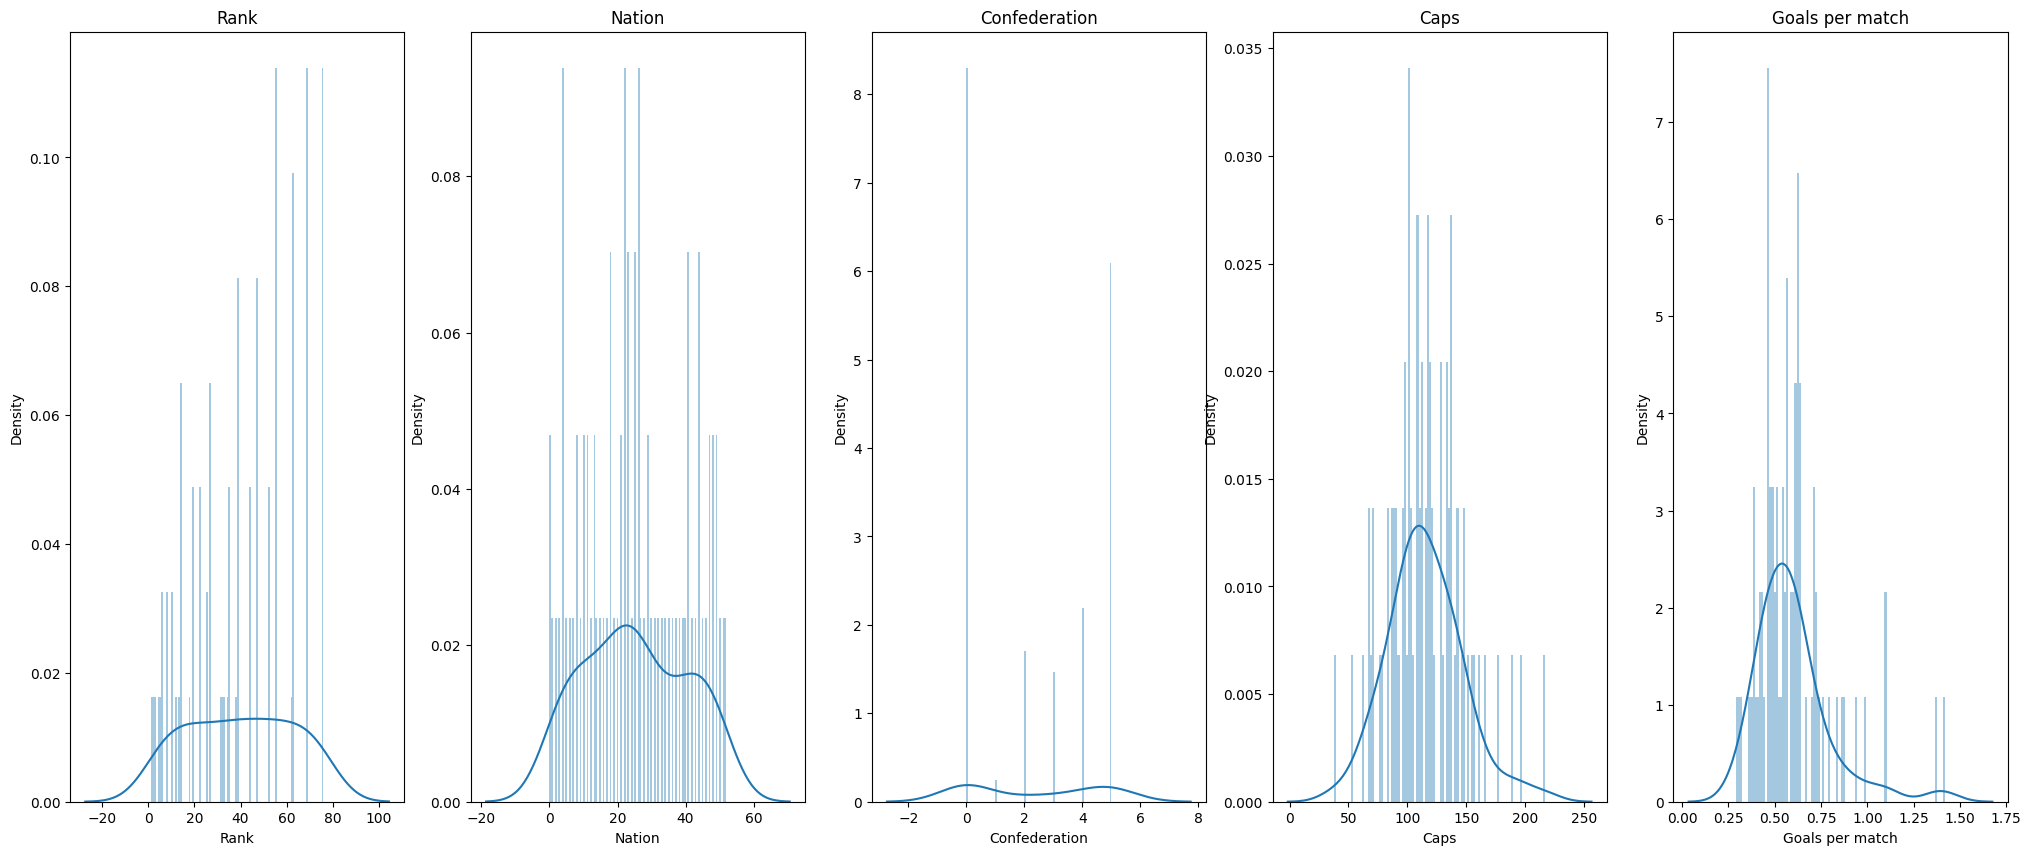

In [26]:
#데이터 시각화
cols = X.columns

fig, axes = plt.subplots(1, 5, figsize=(25, 10))

i = 1
for col in cols:
    plt.subplot(1, 5, i)
    sns.distplot(X[col], bins=100)
    plt.title(col)
    i+=1

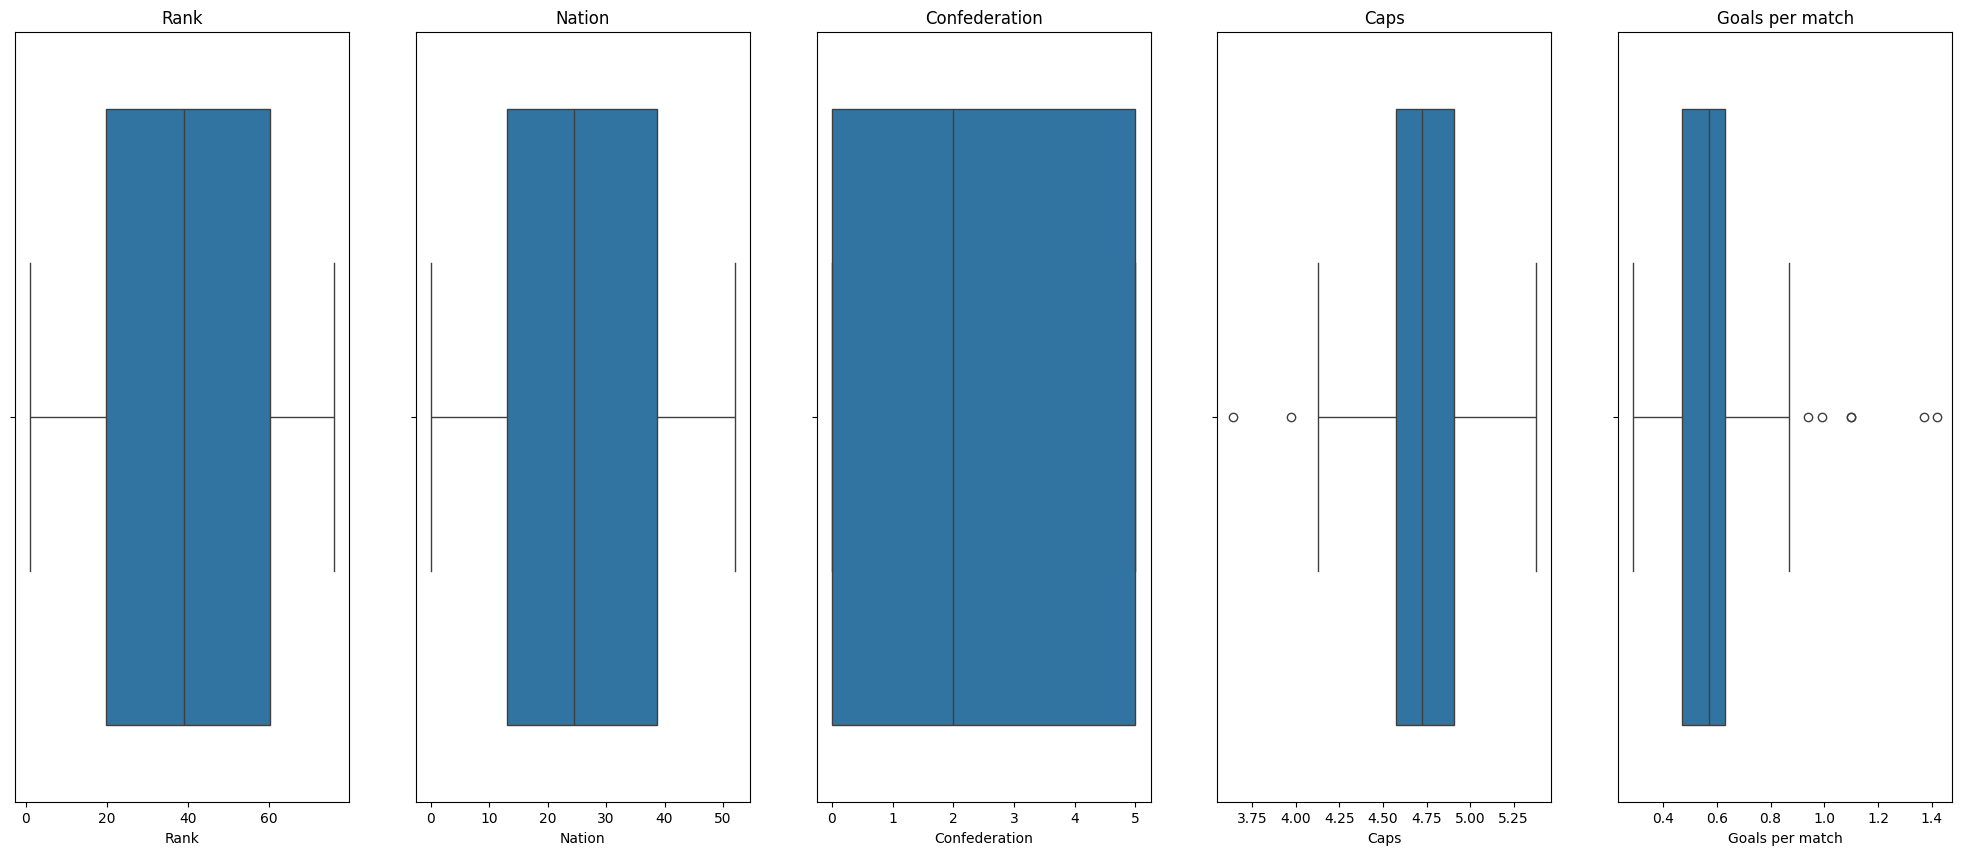

In [35]:
fig, axes = plt.subplots(1, 5, figsize=(25, 10))

for i, (col, ax) in enumerate(zip(cols, axes)):
    plt.subplot(1, 5, i+1)
    sns.boxplot(x=X[col], ax=ax)
    plt.title(col)

In [31]:
X['Caps'] = np.log(X['Caps'])
X

,Rank,Nation,Confederation,Caps,Goals per match
0,1,35,5,5.379897,0.62
1,2,0,4,5.247024,0.59
2,3,22,0,4.997212,0.73
3,4,20,0,5.017280,0.62
4,5,29,0,4.955827,0.63
...,...,...,...,...,...
77,76,41,0,4.634729,0.49
78,76,1,1,4.682131,0.46
79,76,25,0,4.779123,0.42
80,76,29,0,4.859812,0.39


In [36]:
def replace_outliers(data, cols):
    for col in cols:
        Q1 = np.percentile(data[col], 25)
        Q3 = np.percentile(data[col], 75)
        IQR = Q3-Q1
        outlier_step = 1.5*IQR
        
        min = Q1-outlier_step
        max = Q3+outlier_step
        
        data.loc[data[col]<min, col] = min
        data.loc[data[col]>max, col] = max
        
    return data

X = replace_outliers(X, ['Caps', 'Goals per match']) 
X

,Rank,Nation,Confederation,Caps,Goals per match
0,1,35,5,5.379897,0.62
1,2,0,4,5.247024,0.59
2,3,22,0,4.997212,0.73
3,4,20,0,5.017280,0.62
4,5,29,0,4.955827,0.63
...,...,...,...,...,...
77,76,41,0,4.634729,0.49
78,76,1,1,4.682131,0.46
79,76,25,0,4.779123,0.42
80,76,29,0,4.859812,0.39


In [38]:
scaler = MinMaxScaler()
cols = ['Rank', 'Nation', 'Confederation','Caps']

X[cols] = scaler.fit_transform(X[cols])

X

,Rank,Nation,Confederation,Caps,Goals per match
0,0.000000,0.673077,1.0,1.000000,0.62
1,0.013333,0.000000,0.8,0.897800,0.59
2,0.026667,0.423077,0.0,0.705658,0.73
3,0.040000,0.384615,0.0,0.721093,0.62
4,0.053333,0.557692,0.0,0.673826,0.63
...,...,...,...,...,...
77,1.000000,0.788462,0.0,0.426854,0.49
78,1.000000,0.019231,0.2,0.463313,0.46
79,1.000000,0.480769,0.0,0.537915,0.42
80,1.000000,0.557692,0.0,0.599977,0.39


In [39]:
#모델링
from sklearn.model_selection import KFold, GridSearchCV, train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.decomposition import PCA

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
sample_model = GradientBoostingRegressor()

sample_model.fit(X_train, y_train)
pred = sample_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, pred))
rmse

6.25731811196684

In [43]:
important = sample_model.feature_importances_
import_df = pd.DataFrame(important.reshape(1, -1), columns=[col for col in X.columns])
import_df

,Rank,Nation,Confederation,Caps,Goals per match
0,0.999108,0.000668,0.000168,0.000031,0.000026


In [48]:
candidate_col = ['Rank']

pca = PCA(n_components=1)
tmp = X.copy()

pca_result = pca.fit_transform(tmp)
pca_col = ['pca' + str(i) for i in range(pca_result.shape[-1]) ]
pca_df = pd.DataFrame(pca_result, columns=pca_col).reset_index(drop=True)

X = pd.concat((X, pca_df), axis=1)
X

,Rank,Nation,Confederation,Caps,Goals per match,pca0
0,0.000000,0.673077,1.0,1.000000,0.62,0.459308
1,0.013333,0.000000,0.8,0.897800,0.59,0.473183
2,0.026667,0.423077,0.0,0.705658,0.73,-0.379293
3,0.040000,0.384615,0.0,0.721093,0.62,-0.380067
4,0.053333,0.557692,0.0,0.673826,0.63,-0.427783
...,...,...,...,...,...,...
77,1.000000,0.788462,0.0,0.426854,0.49,-0.588629
78,1.000000,0.019231,0.2,0.463313,0.46,-0.179191
79,1.000000,0.480769,0.0,0.537915,0.42,-0.512975
80,1.000000,0.557692,0.0,0.599977,0.39,-0.543180


In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
rf = RandomForestRegressor()
gb = GradientBoostingRegressor()
lr = LinearRegression()
la = Lasso()
ri = Ridge()

In [64]:
models=[]

In [66]:
models = [rf, gb, lr, la, ri]
r2s, rmses = [], []

for model in models:
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    
    r2 = r2_score(y_test, pred)
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    
    r2s.append(r2)
    rmses.append(rmse)
    
result = pd.DataFrame({'r2': r2s, 'rmse': rmses}, index=[type(model).__name__ for model in models]).sort_values(by='rmse')
result

,r2,rmse
GradientBoostingRegressor,0.902462,6.094211
RandomForestRegressor,0.862167,7.244486
LinearRegression,0.858721,7.334477
Ridge,0.599940,12.342216
Lasso,0.487933,13.963484


In [69]:
train_pred = np.zeros((1, len(X_train)))
test_pred = np.zeros((1, len(X_test)))
scores = []

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for i, (train_idx, test_idx) in enumerate(kf.split(X_train, y_train)):
    X_train2, X_val = X_train.iloc[train_idx, :], X_train.iloc[test_idx, :]
    y_train2, y_val = y_train.iloc[train_idx], y_train.iloc[test_idx]
    
    model = GradientBoostingRegressor()
    model.fit(X_train2, y_train2)
    pred = model.predict(X_val)
    
    r2 = r2_score(y_val, pred)
    rmse = np.sqrt(mean_squared_error(y_val, pred))
    
    print(f"{i}th r2 score : {r2} | rmse : {rmse}")
    
    scores.append(rmse)
    train_pred[0][test_idx] += pred
    test_pred += (model.predict(X_test)/5)
    
print(f"Mean rmse : {np.mean(scores)}")
    

0th r2 score : 0.9709064450029848 | rmse : 2.806406598259436
1th r2 score : 0.9792792868913551 | rmse : 1.4410014540519862
2th r2 score : 0.9205075006997352 | rmse : 5.306875022418967
3th r2 score : 0.994389093263671 | rmse : 0.7353719379391953
4th r2 score : 0.9946958013953464 | rmse : 0.5546562170118585
Mean rmse : 2.1688622459362885


In [70]:
train_pred2 = np.zeros((1, len(X_train)))
test_pred2 = np.zeros((1, len(X_test)))
scores = []

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for i, (train_idx, test_idx) in enumerate(kf.split(X_train, y_train)):
    X_train2, X_val = X_train.iloc[train_idx, :], X_train.iloc[test_idx, :]
    y_train2, y_val = y_train.iloc[train_idx], y_train.iloc[test_idx]
    
    model = RandomForestRegressor()
    model.fit(X_train2, y_train2)
    pred = model.predict(X_val)
    
    r2 = r2_score(y_val, pred)
    rmse = np.sqrt(mean_squared_error(y_val, pred))
    
    print(f"{i}th r2 score : {r2} | rmse : {rmse}")
    
    scores.append(rmse)
    train_pred2[0][test_idx] += pred
    test_pred2 += (model.predict(X_test)/5)
    
print(f"Mean rmse : {np.mean(scores)}")

0th r2 score : 0.9257200743169398 | rmse : 4.484230488826717
1th r2 score : 0.9684378483703353 | rmse : 1.7784651982927495
2th r2 score : 0.9122122423756555 | rmse : 5.576898779787923
3th r2 score : 0.9800442657170924 | rmse : 1.3868336930965053
4th r2 score : 0.9923388594164456 | rmse : 0.6665929446417471
Mean rmse : 2.7786042209291284


In [71]:
train_pred3 = np.zeros((1, len(X_train)))
test_pred3 = np.zeros((1, len(X_test)))
scores = []

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for i, (train_idx, test_idx) in enumerate(kf.split(X_train, y_train)):
    X_train2, X_val = X_train.iloc[train_idx, :], X_train.iloc[test_idx, :]
    y_train2, y_val = y_train.iloc[train_idx], y_train.iloc[test_idx]
    
    model = LinearRegression()
    model.fit(X_train2, y_train2)
    pred = model.predict(X_val)
    
    r2 = r2_score(y_val, pred)
    rmse = np.sqrt(mean_squared_error(y_val, pred))
    
    print(f"{i}th r2 score : {r2} | rmse : {rmse}")
    
    scores.append(rmse)
    train_pred3[0][test_idx] += pred
    test_pred3 += (model.predict(X_test)/5)
    
print(f"Mean rmse : {np.mean(scores)}")

0th r2 score : 0.921683741275414 | rmse : 4.604454260108449
1th r2 score : 0.9356769604505515 | rmse : 2.5388985612264996
2th r2 score : 0.9408925306736798 | rmse : 4.576115389913083
3th r2 score : 0.8597928436931721 | rmse : 3.6760009802311586
4th r2 score : 0.5672063229396527 | rmse : 5.0101929373528264
Mean rmse : 4.081132425766404


In [74]:
final_train = np.zeros((1, len(X_train)))
final_test = np.zeros((1, len(X_test)))
scores = []

all_train = np.concatenate((train_pred.reshape(-1,1), train_pred2.reshape(-1,1), train_pred3.reshape(-1,1)), axis=1)
all_test = np.concatenate((test_pred.reshape(-1,1), test_pred2.reshape(-1,1), test_pred3.reshape(-1,1))


kf = KFold(n_splits=5, shuffle=True, random_state=42)

for i, (train_idx, test_idx) in enumerate(kf.split(all_train, y_train)):
    X_train2, X_val = all_train[train_idx, :], all_train[test_idx, :]
    y_train2, y_val = y_train.iloc[train_idx], y_train.iloc[test_idx]
    
    model = LinearRegression()
    model.fit(X_train2, y_train2)
    pred = model.predict(X_val)
    
    r2 = r2_score(y_val, pred)
    rmse = np.sqrt(mean_squared_error(y_val, pred))
    
    print(f"{i}th r2 score : {r2} | rmse : {rmse}")
    
    scores.append(rmse)
    final_train[0][test_idx] += pred
    final_test += (model.predict(all_test)/5)
    
print(f"Mean rmse : {np.mean(scores)}")

0th r2 score : 0.9637891742561775 | rmse : 3.1309159649793528
1th r2 score : 0.9697842282333264 | rmse : 1.7401188673272594
2th r2 score : 0.8647336393696602 | rmse : 6.922623094689612
3th r2 score : 0.9830481355527338 | rmse : 1.2782013252659636
4th r2 score : 0.9597324504804526 | rmse : 1.5282401225376037
Mean rmse : 2.9200198749599586


In [76]:
final_test.shape

(1, 17)

In [77]:
submission = pd.DataFrame({'final' : final_test[0]})
submission

,final
0,64.856484
1,111.481491
2,70.961575
3,64.835119
4,71.962032
5,68.716590
6,80.167249
7,58.083884
8,94.603363
9,79.710942


In [78]:
submission.to_csv("submission", index=False)